# 04 - Infonuagique 1 - Atelier #1

### Importation des bibliothèques

In [1]:
import io
import os
from google.cloud import vision

from utils import display_objects_results, display_image

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)

### Affichage de l'image

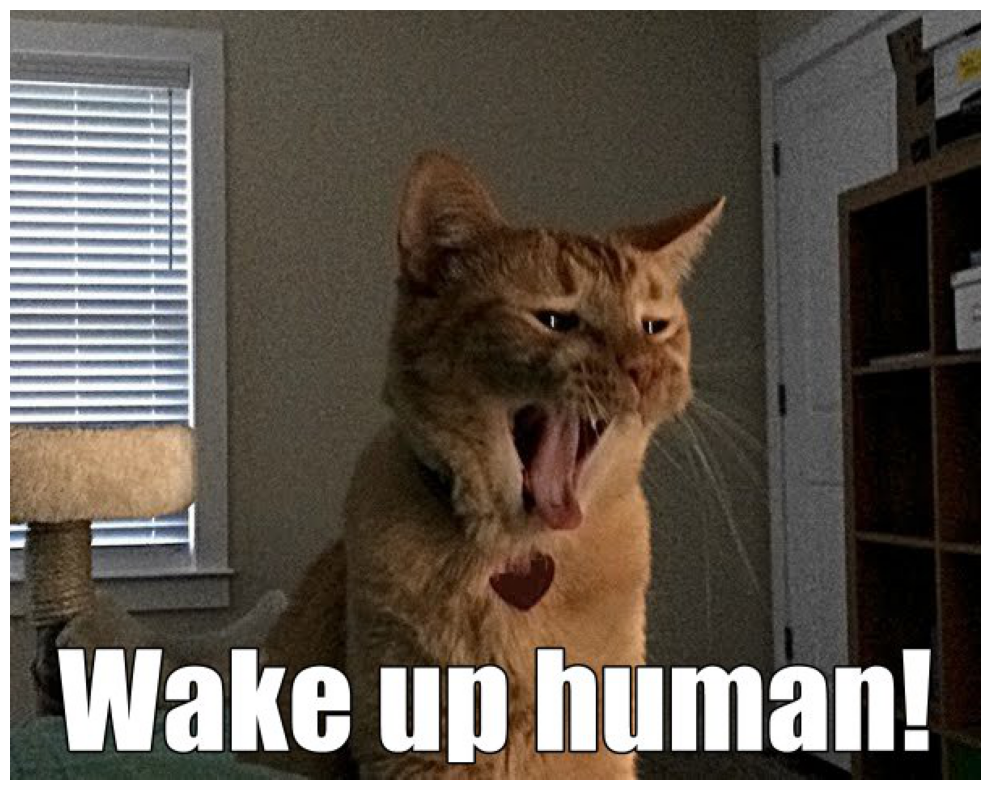

In [3]:
_ = display_image('wakeupcat.jpg')

### Instanciation du client

In [4]:
client = vision.ImageAnnotatorClient()

DefaultCredentialsError: Your default credentials were not found. To set up Application Default Credentials, see https://cloud.google.com/docs/authentication/external/set-up-adc for more information.

### Chargement de l'image

In [20]:
file_name = os.path.abspath('wakeupcat.jpg')

with io.open(file_name, 'rb') as image_file:
    content = image_file.read()

image = vision.Image(content=content)

### Détection des "étiquette" présentes dans l'image

In [21]:
response = client.label_detection(image=image)
labels = response.label_annotations

In [22]:
print('Labels:')
for label in labels:
    print(label.description)

Labels:
Cat
Window
Felidae
Carnivore
Jaw
Small to medium-sized cats
Gesture
Whiskers
Window blind
Fawn


### Détection d'objets

In [23]:
objects = client.object_localization(image=image).localized_object_annotations

In [24]:
print('Number of objects found: {}'.format(len(objects)))
for object_ in objects:
    print('\n{} (confidence: {})'.format(object_.name, object_.score))
    print('Normalized bounding polygon vertices: ')
    for vertex in object_.bounding_poly.normalized_vertices:
        print(' - ({}, {})'.format(vertex.x, vertex.y))

Number of objects found: 3

Cat (confidence: 0.8416515588760376)
Normalized bounding polygon vertices: 
 - (0.2858031690120697, 0.175541952252388)
 - (0.7383379936218262, 0.175541952252388)
 - (0.7383379936218262, 0.9802820086479187)
 - (0.2858031690120697, 0.9802820086479187)

Window (confidence: 0.5885751247406006)
Normalized bounding polygon vertices: 
 - (0.002054743003100157, 0.015750588849186897)
 - (0.21850936114788055, 0.015750588849186897)
 - (0.21850936114788055, 0.7842485308647156)
 - (0.002054743003100157, 0.7842485308647156)

Furniture (confidence: 0.5878639817237854)
Normalized bounding polygon vertices: 
 - (0.8299599289894104, 0.0846247673034668)
 - (0.9973958134651184, 0.0846247673034668)
 - (0.9973958134651184, 0.9860828518867493)
 - (0.8299599289894104, 0.9860828518867493)


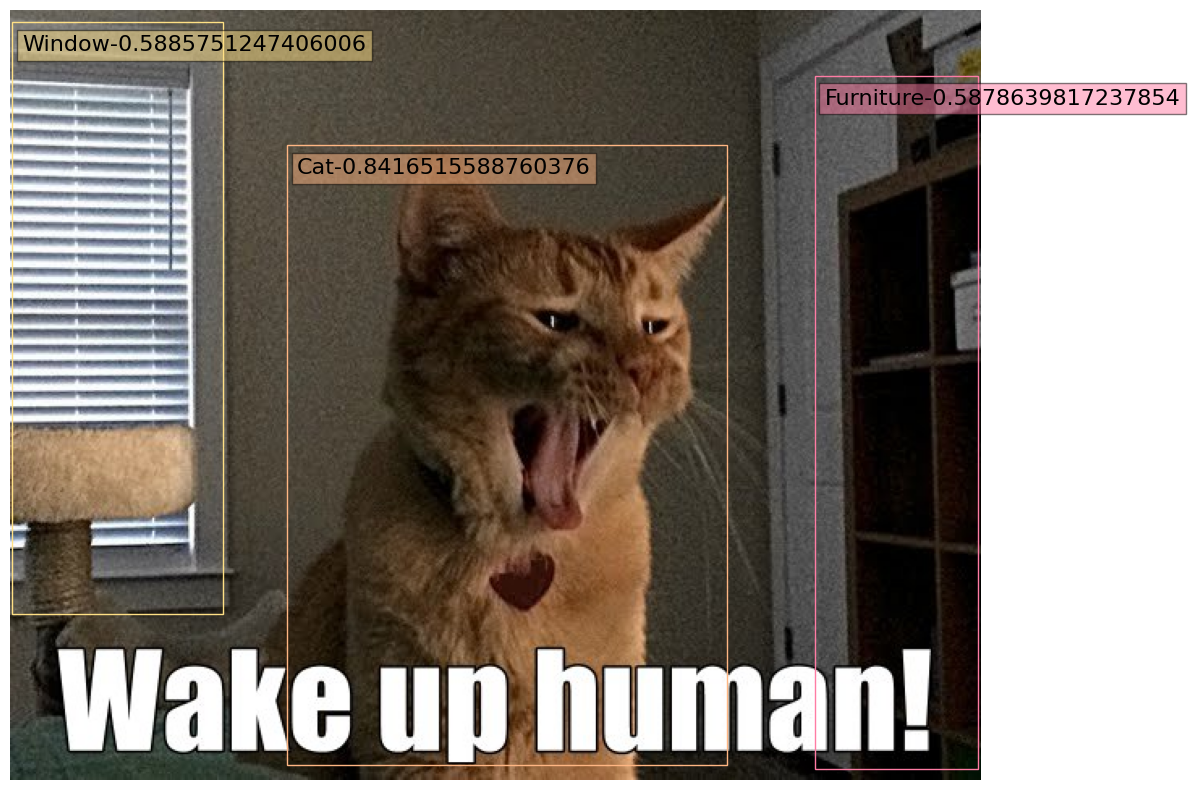

In [27]:
display_objects_results('wakeupcat.jpg', objects, 0.5)

### Avec une autre image

In [28]:
file_name = os.path.abspath('raptors.jpg')

with io.open(file_name, 'rb') as image_file:
    content = image_file.read()

image = vision.Image(content=content)

In [29]:
response = client.label_detection(image=image)
labels = response.label_annotations

In [30]:
print('Labels:')
for label in labels:
    print(label.description)

Labels:
Basketball
Sports uniform
Shorts
Muscle
Sports equipment
Jersey
Basketball moves
Player
Basketball player
Field house


In [31]:
objects = client.object_localization(image=image).localized_object_annotations

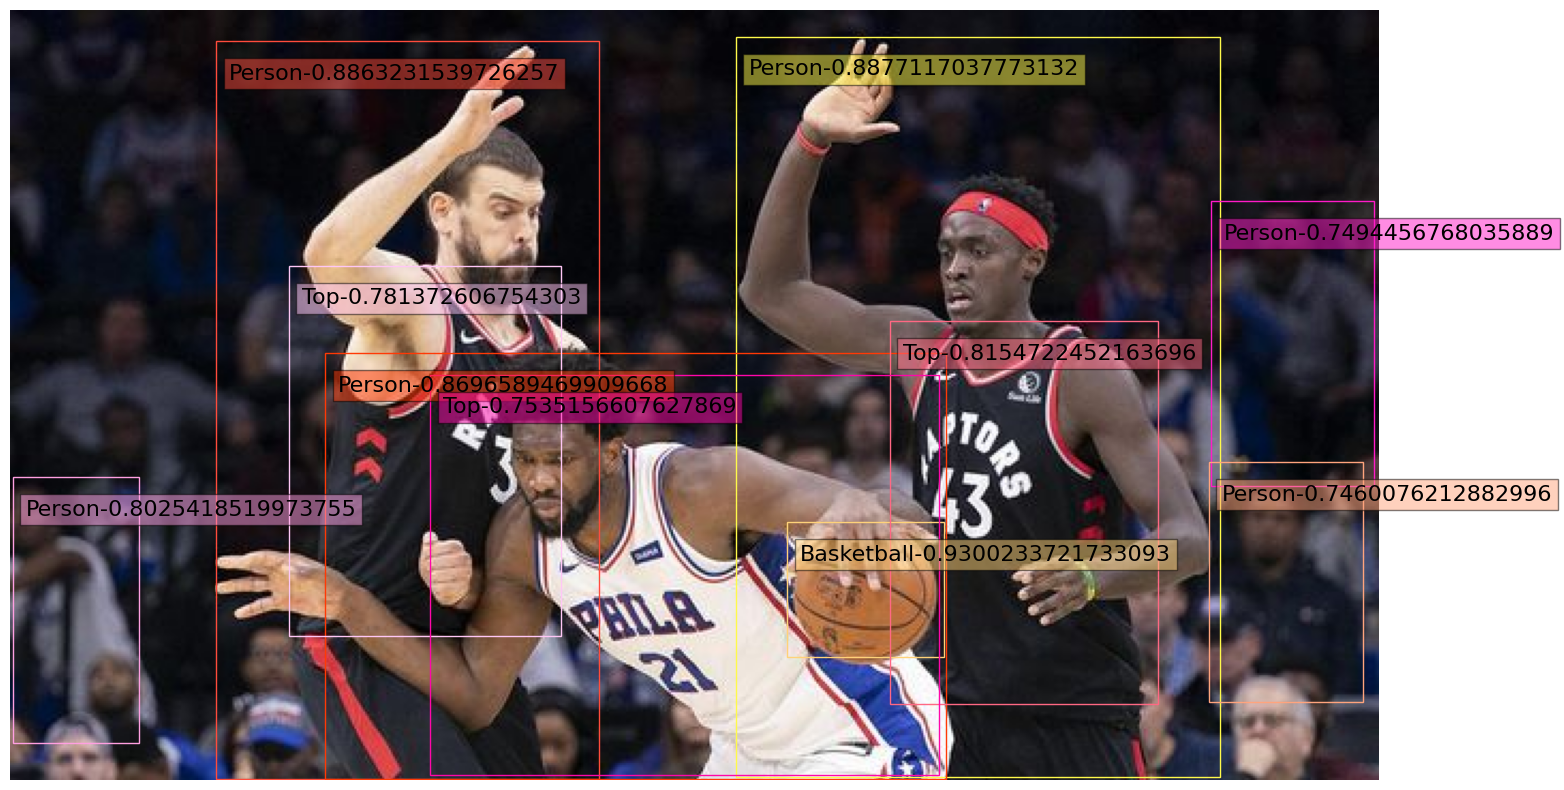

In [32]:
display_objects_results('raptors.jpg', objects, 0.5)